<a href="https://colab.research.google.com/github/oyinloluwa20/Deep-Learning/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import torch
from torch import nn #nn contains all of pytorch's building block from neural network
import matplotlib.pyplot as plt

#check pyTorch version
torch.__version__


'1.13.1+cu116'

##Data(preparing and loading)
* Excel speadsheet
* Images of any kind
* Vidoes (youtube has a lot of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

let's create some known data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

## Linear Regression
A linear regression line has an equation of the form Y =a+bX, where Xis the independent variable and Y is the dependent variable. The slope of the line is b and a is the intercept( the value of y when x = 0)

### Formula
   *Y =f(X,B) + e*
 * Y = dependent variable
 * f = function
 * X = independent variable
 * B = unknown parameter
 * e = error

In [23]:
# Create a known parameters
weight =0.7
bias =0.3

#Create
start =0
end=1
step=0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
print(f'The len of x and y {len(y), len(X)}')
X[:10], y[:10]

The len of x and y (50, 50)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [24]:
 len(X) , len(y)

(50, 50)

### Splitting data into training and testing sets

In [25]:
#Create a train/test split
train_split =int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
 
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

##Data visualization
Let's visualise our data using the mathplot library

In [26]:
def plot_predictions(train_data =X_train,
                    train_labels =y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions =None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label ="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label ="Test data")

  #If there are predictions, then plot it
  if predictions is not None:
    plt.scatter(test_data, predictions, c ="r" , label =" Predictions")

  # Show the legend, i.e the show the label
  plt.legend(prop ={"size" :14});


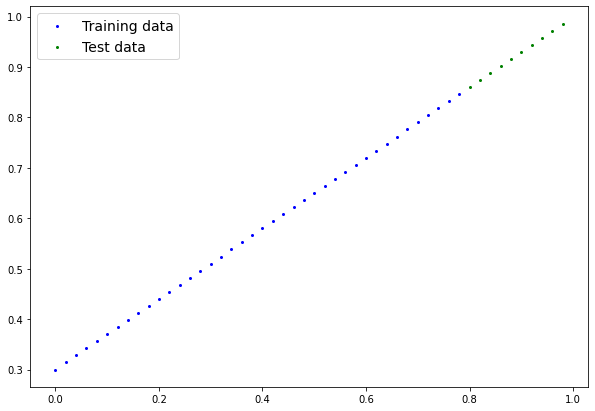

In [27]:
plot_predictions()

##2. Build model
First PyTorch model.
you have to be familar with oop in python, https://realpython.com/pyhton3-object-oriented-programming/ is a great resource to learn.

The process our model follows:
* Start with random values (weight & bias)
* Looks at training data and adjust the random values to better represent ( or get closer to) the idea values ( the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

Learn this 2 concepts from 3blue1brown- youtube channel


In [45]:
from torch import nn
#Create linear regression model class
class linearRegressionModel(nn.Module):
  def __init__(self):
      super().__init__()
      self.weights =nn.Parameter(torch.randn(1,
                                             requires_grad =True,
                                             dtype= torch.float)) # we create a weight parameter using nn.parameter
      self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad =True,
                                           dtype= torch.float)) # we create a bias also using nn.parameter
  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor)-> torch.Tensor: # <- "x" is the input data
      return self.weights * x +self.bias  #this is the linear regression formula

### Pytorch model building essentials

* torch.nn - contains all of the building blcks for computataion graphs( a neural network can be considered as a computational graph)
* torch.nn.parameters - the parameters required for the classes
* torch.nn.module - The base class for all neural network modules, if you subclass it, you should overwrite the forward() 
* torch.optim - this is where the optimizers in PyTorch live, they help with gradient descent
* def forward() -A ll nn.module sunclasses requires you to overwrite forward(), this defines what happens in the forward computation
* torch.utils.data.Dataset - Represents a map between key(label) and sample(features) pairs of your data. Such as images and their associated labels
* torch.utils.data.Dataloader - Creates a Python iterable over a torch Dataset(allows you to iterate over your data)

## Checking the contents of our PyTorch model
To check our model parameters we use .parameters().

In [44]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = linearRegressionModel()
#Check out the parameters with different methods
model_0.bias, model_0.weights,list(model_0.parameters()),model_0.state_dict()


(Parameter containing:
 tensor([0.1288], requires_grad=True), Parameter containing:
 tensor([0.3367], requires_grad=True), [Parameter containing:
  tensor([0.3367], requires_grad=True), Parameter containing:
  tensor([0.1288], requires_grad=True)], OrderedDict([('weights',
               tensor([0.3367])),
              ('bias', tensor([0.1288]))]))

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.
When we pass data through our model, it.s going to run it through the `forward()` method.

In [48]:
# Make predictions with the model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

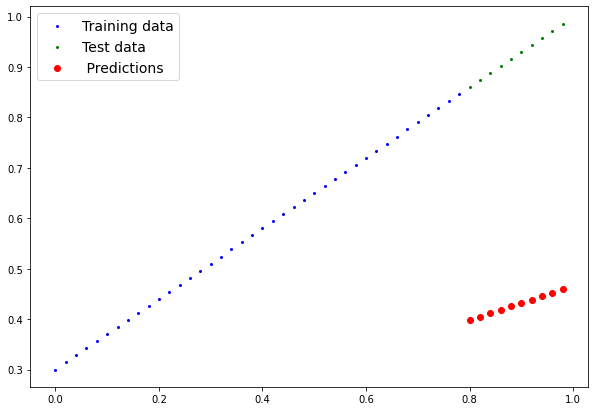

In [49]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to a known parameters

or in other wors from a poor representation of the data to a better representation

One way to measure how poor or how wrong your models predictions are, is to use a loss function.

* Note: Loss function may also be called cost function or critierion in different areas

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better
* **Optimizer:** Takes into account the loss of a model and adjust the model.s parameters (i.e weight& bias)

In [50]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()